In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('moviereviews.csv')

In [11]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [12]:
df.describe()

,label,review
count,2000,1965
unique,2,1939
top,neg,
freq,1000,27


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


C:\Users\Harshit Panchal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


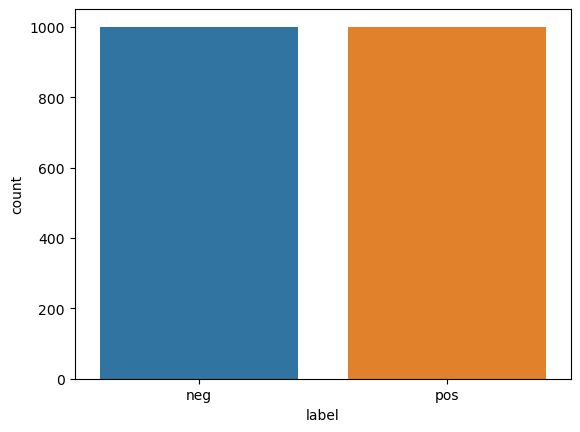

In [14]:
sns.countplot(df['label'])
plt.show()

In [27]:
data = df.dropna()

In [28]:
data.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [30]:
data.describe()

,label,review
count,1965,1965
unique,2,1939
top,neg,
freq,983,27


In [15]:
from sklearn.model_selection import train_test_split

In [31]:
X = data['review']

In [32]:
y = data['label']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf = TfidfVectorizer(stop_words='english')

In [36]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [37]:
X_train_tfidf = tfidf.transform(X_train)

In [38]:
X_test_tfidf = tfidf.transform(X_test)

In [39]:
X_train_tfidf

<1316x32851 sparse matrix of type '<class 'numpy.float64'>'
	with 318153 stored elements in Compressed Sparse Row format>

In [40]:
X_test_tfidf

<649x32851 sparse matrix of type '<class 'numpy.float64'>'
	with 146173 stored elements in Compressed Sparse Row format>

### Building Models

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [58]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [59]:
from sklearn.svm import SVC, LinearSVC
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [60]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [61]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [62]:
def results(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test_tfidf, y_test)
    plt.show()

              precision    recall  f1-score   support

         neg       0.76      0.88      0.81       322
         pos       0.86      0.73      0.79       327

    accuracy                           0.80       649
   macro avg       0.81      0.80      0.80       649
weighted avg       0.81      0.80      0.80       649



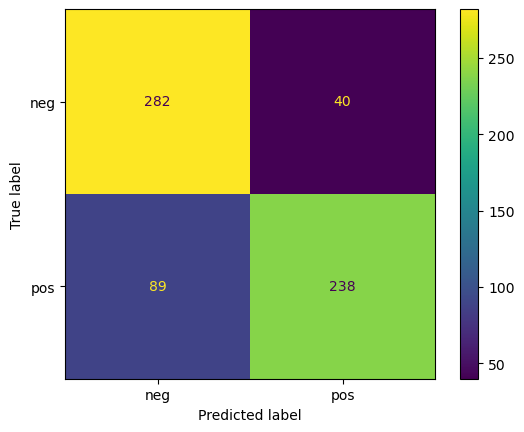

In [63]:
results(nb)

              precision    recall  f1-score   support

         neg       0.81      0.76      0.78       322
         pos       0.78      0.82      0.80       327

    accuracy                           0.79       649
   macro avg       0.79      0.79      0.79       649
weighted avg       0.79      0.79      0.79       649



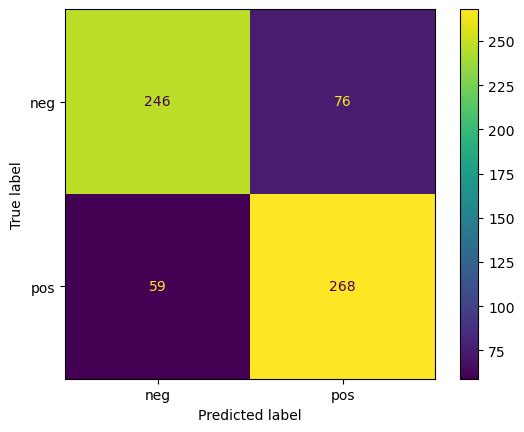

In [64]:
results(rbf_svc)

              precision    recall  f1-score   support

         neg       0.82      0.82      0.82       322
         pos       0.82      0.83      0.83       327

    accuracy                           0.82       649
   macro avg       0.82      0.82      0.82       649
weighted avg       0.82      0.82      0.82       649



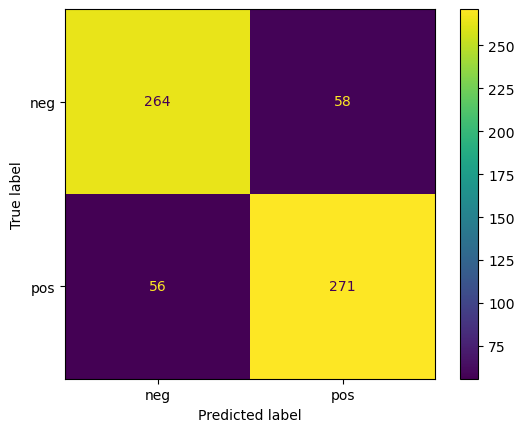

In [65]:
results(linear_svc)

              precision    recall  f1-score   support

         neg       0.80      0.80      0.80       322
         pos       0.80      0.81      0.80       327

    accuracy                           0.80       649
   macro avg       0.80      0.80      0.80       649
weighted avg       0.80      0.80      0.80       649



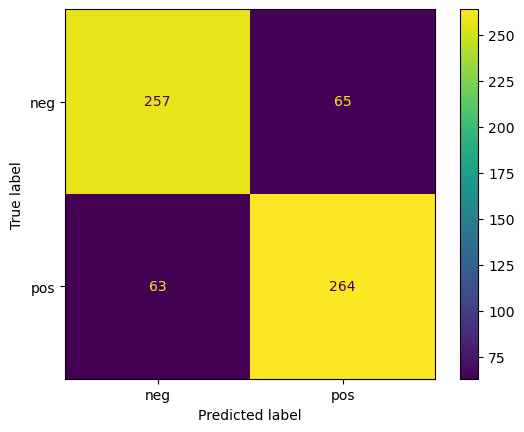

In [67]:
results(log_model)

In [68]:
from sklearn.pipeline import Pipeline

In [78]:
pipe = Pipeline(steps = [('tfidf', TfidfVectorizer()),
                ('svc', LinearSVC())])

In [79]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [87]:
pipe.predict(['Bad Movie'])

array(['neg'], dtype=object)

In [88]:
pipe.predict(['Movies was good but actor in movie was doing an overacting'])

array(['neg'], dtype=object)

In [89]:
pipe.predict(['Excellent Movie MAn!'])

array(['pos'], dtype=object)